# Wheeler Kiladis Diagrams Tutorial

## Summary

This turorial is for using Wheeler Kiladis. It assumes a good understanding of the science behind it.


Reference: 

© Software was developed by Charles Doutriaux, tutorial was written by Charles Doutriaux (5 Sep. 2018)


## Contents:

* [Prepare Notebook](#prep)
* [Processing Data](#process)
  * [Power](#power)
  * [Symetric and Anti-Symetric Separation](#sym)
  * [Background](#bg)
* [Plotting Processed Data](#plot)
  * [Figure 1](#fig1)
  * [Figure 2](#fig2)
  * [Figure 3](#fig3)

## Peparing the Notebook<a id="prep"></a>

Let's get some sample data, download locally the [wk.txt file](https://github.com/CDAT/wk/raw/master/share/test_data_files.txt)
You will also need the [colormap file](https://github.com/CDAT/wk/raw/master/tests/colormap.scr)


In [1]:
import cdat_info
import cdms2
import WK
import os
cdat_info.download_sample_data_files("wk.txt")

('MD5:', 'wk.txt')


Work around to viz figures in Notebook

In [2]:
import tempfile
import base64
class VCSAddonsNotebook(object):
    def __init__(self, x):
        self.x = x
    def _repr_png_(self):
        fnm = tempfile.mktemp()+".png"
        x.png(fnm)
        encoded = base64.b64encode(open(fnm, "rb").read())
        return encoded
    def __call__(self):
        return self

## Processing Data<a id="process"></a>

### Power<a id="power"></a>

First we will load data in

In [3]:
with cdms2.open(os.path.join(cdat_info.get_sampledata_path(), "wk_data.nc")) as f:
            data = f("rlut", time=slice(0, 150), latitude=(-15, 15))

Then we create our Wheeler-Kiladis processing object and compute the power.

Where:
* frequency: data frequency in samples per day (default=1, i.e daily)
* number_of_days: length of time subdomains in days (default=96 days)
* shift: Number of days to shift subtimedomains by (default=30 days)
* dosymetric : if we need to do the symetric/antisymetric separation (default=1)


In [4]:
W = WK.WK()
# Same as
# W = WK.WK(frequency=1, number_of_days=96, shift=30, dosymetric=1)

Now we can compute the power

In [5]:
power = W.process(data)

Done : |                                       | 0.00%

/home/doutriaux1/anaconda2/envs/nightly_py2_cdat_openblas/lib/python2.7/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/doutriaux1/anaconda2/envs/nightly_py2_cdat_openblas/lib/python2.7/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


Done : ########################################| 100.00%


### Symetric and Anti-Symetric Separation<a id="sym"></a>

Now let's compute the symetric and anti-symtric components, where:
* Will average over time if compresstime is True (default)
* Will apply 121 smoothing if smooth is True (default)


In [6]:
Sym, Antisym = W.split(power, compresstime=True, smooth=True)

### Background<a id="bg"></a>

Finally use these to compute our background, where:

* wavenumber_smoothing_windows: list of tuples of increasing wavenumber/number of 121 smoothing
* frequencies_smoothing_windows: list of tuples of increasing frequency/number of 121 smoothing




In [7]:
Background = W.background(Sym, Antisym)
# Same as
# Background = W.background(Sym, Antisym, wavenumber_smoothing_windows=((1000, 10,),),frequencies_smoothing_windows=((.1, 5), (.2, 10), (.3, 20), (1000, 40)))

Done : |                                       | 0.00Done : #                                       | 1.19Done : #/                                      | 2.38Done : ##                                      | 3.57Done : ##-                                     | 4.76Done : ###                                     | 5.95Done : ###|                                    | 7.14Done : ####                                    | 8.33Done : ####\                                   | 9.52Done : #####                                   | 10.71Done : #####-                                  | 11.90Done : ######                                  | 13.10Done : ######|                                 | 14.29Done : #######                                 | 15.48Done : #######/                                | 16.67Done : ########                                | 17.86Done : ########-                               | 19.05Done : #########                               | 20.24Done : #########|                   

## Plotting<a id="plot"></a>

First let's create a Wheeler-Kiladis Plotting object where
* x: a VCS canvas object
* datawc_x1/x2/y2/y2: World coordinate of the plots
* min/max: Minimum and maximum
* delta_isofill: isofills to draw
* delta_isolines: isolines to draw
* day_lines: day lines to draw
* H: value to use for H

In [8]:
import vcs
x = vcs.init()
show = VCSAddonsNotebook(x)
WP = WK.WKPlot(x=x)
WP.x.scriptrun("colormap.scr")
WP.x.setcolormap("cmap")
# equivalent to: 
# WP = WK.WKPlot(x=None, datawc_x1=-15, datawc_x2=15, datawc_y1=0, datawc_y2=.8, min=-1.4, max=2., delta_isofill=.2, delta_isoline=.1, days_lines=(30, 6, 3, 2,), H=[12., 25., 50.]))

### Figure 1<a id="fig1"></a>

Let's plot figure 1, where :



/home/doutriaux1/anaconda2/envs/nightly_py2_cdat_openblas/lib/python2.7/site-packages/vtk/util/numpy_support.py:135: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


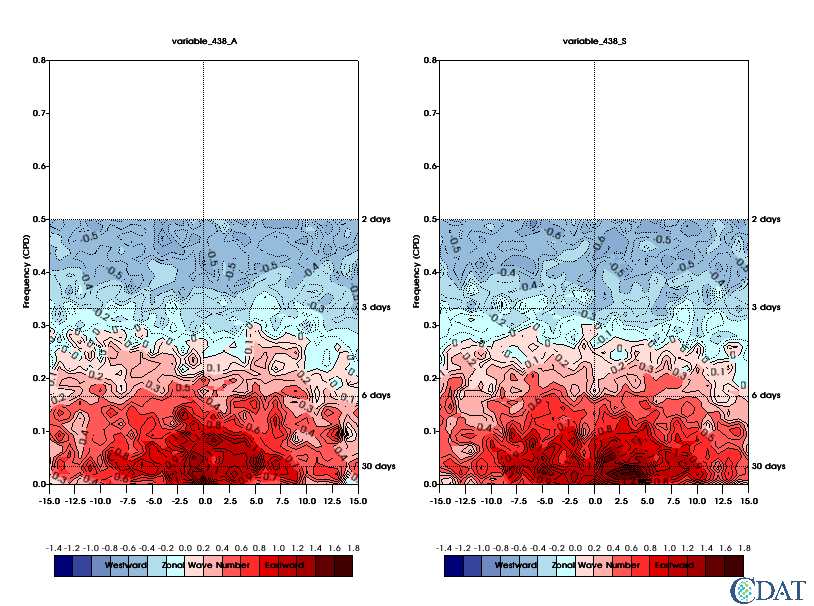

In [9]:
WP.plot_figure1(Sym, Antisym)
# Same as:
# WP.plot_figure1(Sym, Antisym, bg=0, x=None, min=None, max=None, delta_isofill=None, delta_isoline=None, days_lines=None)
show()

### Figure 2<a id="fig2"></a>

Now let's plot figure 2

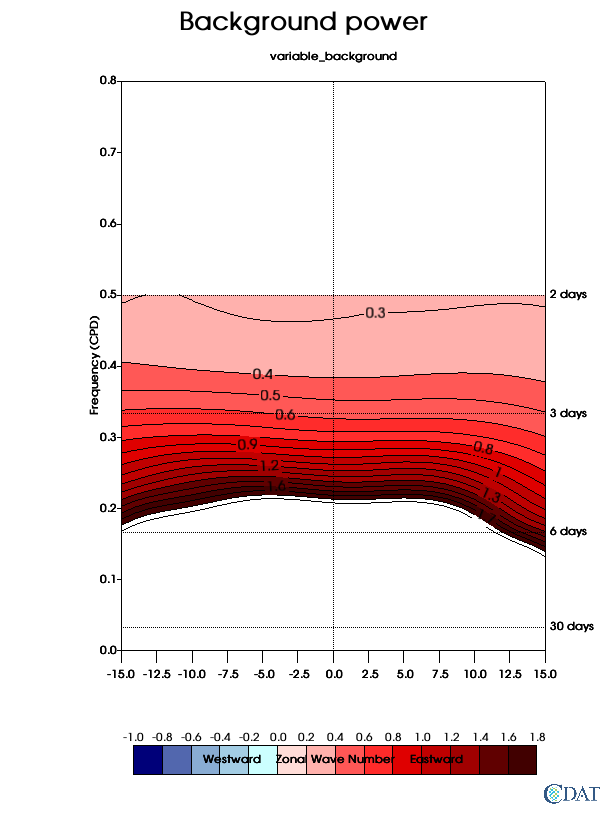

In [10]:
WP.x.clear()
WP.plot_figure2(Background, min=-1, max=2)
# Equivalent to
# WP.plot_figure2(Background,bg=0, x=None, min=-1, max=2.,delta_isofill=None, delta_isoline=.1, days_lines=(30, 6, 3, 2,))
show()

### Figure 3<a id="fig3"></a>

And figure 3



/home/doutriaux1/anaconda2/envs/nightly_py2_cdat_openblas/lib/python2.7/site-packages/WK/plot.py:253: RuntimeWarning: divide by zero encountered in divide
  (k * k * numpy.ma.sqrt(g * h)))
/home/doutriaux1/anaconda2/envs/nightly_py2_cdat_openblas/lib/python2.7/site-packages/WK/plot.py:562: RuntimeWarning: divide by zero encountered in divide
  P = 2 * numpy.pi / (data * 24 * 60 * 60)


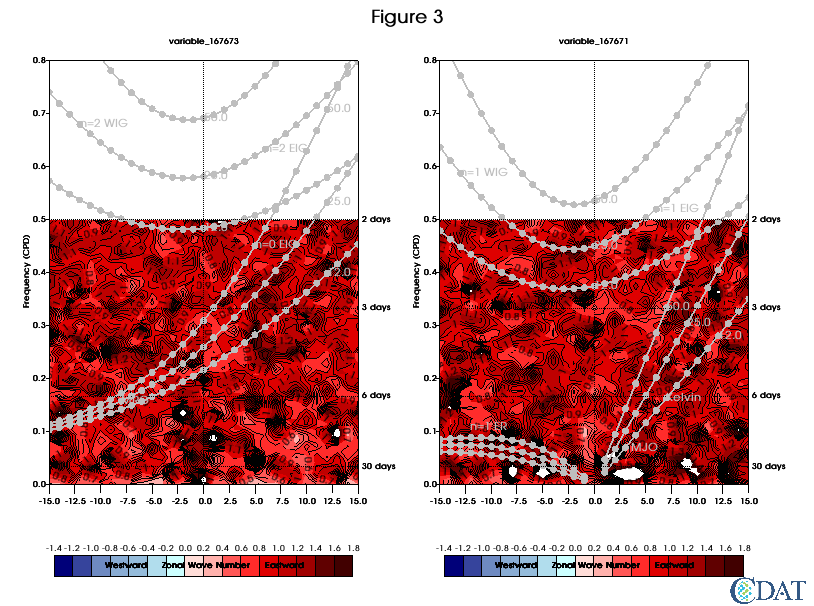

In [11]:
WP.x.clear()
Sym /= Background
Antisym /= Background
WP.plot_figure3(Sym, Antisym, delta_isofill=.2, delta_isoline=.1)
# Eq to
# WP.plot_figure3(Sym, Antisym, bg=0, x=None, min=None, max=None, delta_isofill=.2, delta_isoline=.1, days_lines=None, H=None)
show()